Name:  

    SEAC4RS_AOD_profile

Purpose:  

    Python script for plotting boundary layer AOD profile

Calling Sequence:

    python SEAC4RS_AOD_profile
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - matplotlib
    - mpltools
    - numpy
    - scipy : for saving and reading
    - os
    - datetime
    - mpl_toolkits
    - plotting_utils (user defined plotting routines)
    - map_utils, dependent on geopy
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures

Modification History:

    Written: Samuel LeBlanc, NASA Ames, 2015-10-09

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib notebook
from mpltools import color
import numpy as np
import scipy.io as sio
import math
import os
import Sp_parameters as Sp

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [6]:
from load_modis import mat2py_time, toutc

In [2]:
# set the basic directory path
fp='C:\\Users\\sleblan2\\Research\\SEAC4RS\\'

# Load the 4STAR starsun file

In [3]:
star = sio.loadmat(fp+'dc8\\20130816\\20130816starsun_R2.mat',variable_names=('w','tau_aero','t','Alt','Lat','Lon'))

In [4]:
star

{'Alt': array([[-5.9],
        [-6.1],
        [-6.1],
        ..., 
        [-6.5],
        [-6.5],
        [-6.4]]), 'Lat': array([[ 29.6091],
        [ 29.6091],
        [ 29.6091],
        ..., 
        [ 29.6053],
        [ 29.6054],
        [ 29.6054]]), 'Lon': array([[-95.1683],
        [-95.1683],
        [-95.1683],
        ..., 
        [-95.1665],
        [-95.1665],
        [-95.1665]]), '__globals__': [], '__header__': 'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Aug 26 20:11:38 2015', '__version__': '1.0', 't': array([[ 735462.53499764],
        [ 735462.53502315],
        [ 735462.53503508],
        ..., 
        [ 735462.96053078],
        [ 735462.9605447 ],
        [ 735462.96055862]]), 'tau_aero': array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  

In [5]:
star.keys()

['Lon',
 '__header__',
 'tau_aero',
 '__globals__',
 't',
 'w',
 'Lat',
 'Alt',
 '__version__']

In [7]:
star['tt'] = mat2py_time(star['t'])
star['utc'] = toutc(star['tt'])

<IPython.core.display.Javascript object>


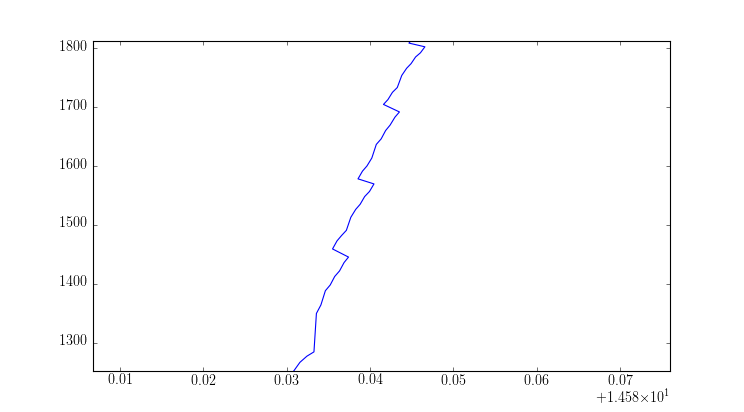

In [8]:
plt.plot(star['utc'],star['Alt'])

In [11]:
plt.plot(star['t'],star['Alt'])

<IPython.core.display.Javascript object>


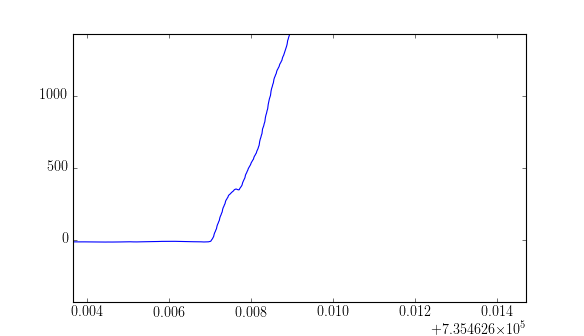

In [13]:
plt.figure()
plt.plot(star['t'],star['Alt'])